# Day4 - Maintained trees of London

In [ ]:
Data from GLA 

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import font_manager
#set fonts
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-R.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-B.ttf')

In [3]:
#load shapefile of london
regions = gpd.GeoDataFrame.from_file("england_regions.geojson")
london = regions[regions["RGN21NM"]=="London"]

#load trees
df = pd.read_csv("Borough_tree_list_2021July.csv")

In [4]:
#prepare dataset
geometry = [Point(xy) for xy in zip(df['longitude'].astype(float), df['latitude'].astype(float))]
geo_df = gpd.GeoDataFrame(df, crs = 'EPSG:4326', geometry = geometry)
geo_df.head()

,objectid,borough,maintainer,gla_tree_name,tree_name,taxon_name,common_name,age,age_group,height_m,spread_m,canopy_spread_group,diameter_at_breast_height_cm,dbh_group,longitude,latitude,condition,load_date,updated,geometry
0,1,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),10 to 15m,NaN,00 to 05m,NaN,21 to 40cm,-0.291147,51.361893,Reasonable,20210318,20210715,POINT (-0.29115 51.36189)
1,2,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),10 to 15m,NaN,00 to 05m,NaN,21 to 40cm,-0.291122,51.361914,Reasonable,20210318,20210715,POINT (-0.29112 51.36191)
2,3,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),05 to 10m,NaN,05 to 10m,NaN,21 to 40cm,-0.290943,51.387016,Reasonable,20210318,20210715,POINT (-0.29094 51.38702)
3,4,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Mature (31-80),10 to 15m,NaN,05 to 10m,NaN,41 to 70cm,-0.288572,51.387405,Reasonable,20210318,20210715,POINT (-0.28857 51.38740)
4,5,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Mature (31-80),10 to 15m,NaN,05 to 10m,NaN,41 to 70cm,-0.285025,51.388872,Reasonable,20210318,20210715,POINT (-0.28502 51.38887)


In [5]:
#check tree types by frequency
geo_df["gla_tree_name"].value_counts()

Cherry            121792
Maple             100142
Other              87807
Lime               64340
Plane              60224
Ash                45937
Oak                41031
Birch              40853
Whitebeam          35210
Hawthorn           27362
Apple              26356
Hornbeam           22465
Pear               18851
Horse chestnut     17648
Sycamore           14203
Cypress            13848
Poplar             13586
Alder              11193
Willow              9731
Black locust        8541
Pine                7346
Beech               6881
Elm                 6373
Hazel               6202
Rowan               5599
Chestnut            3525
Blackthorn           104
Name: gla_tree_name, dtype: int64

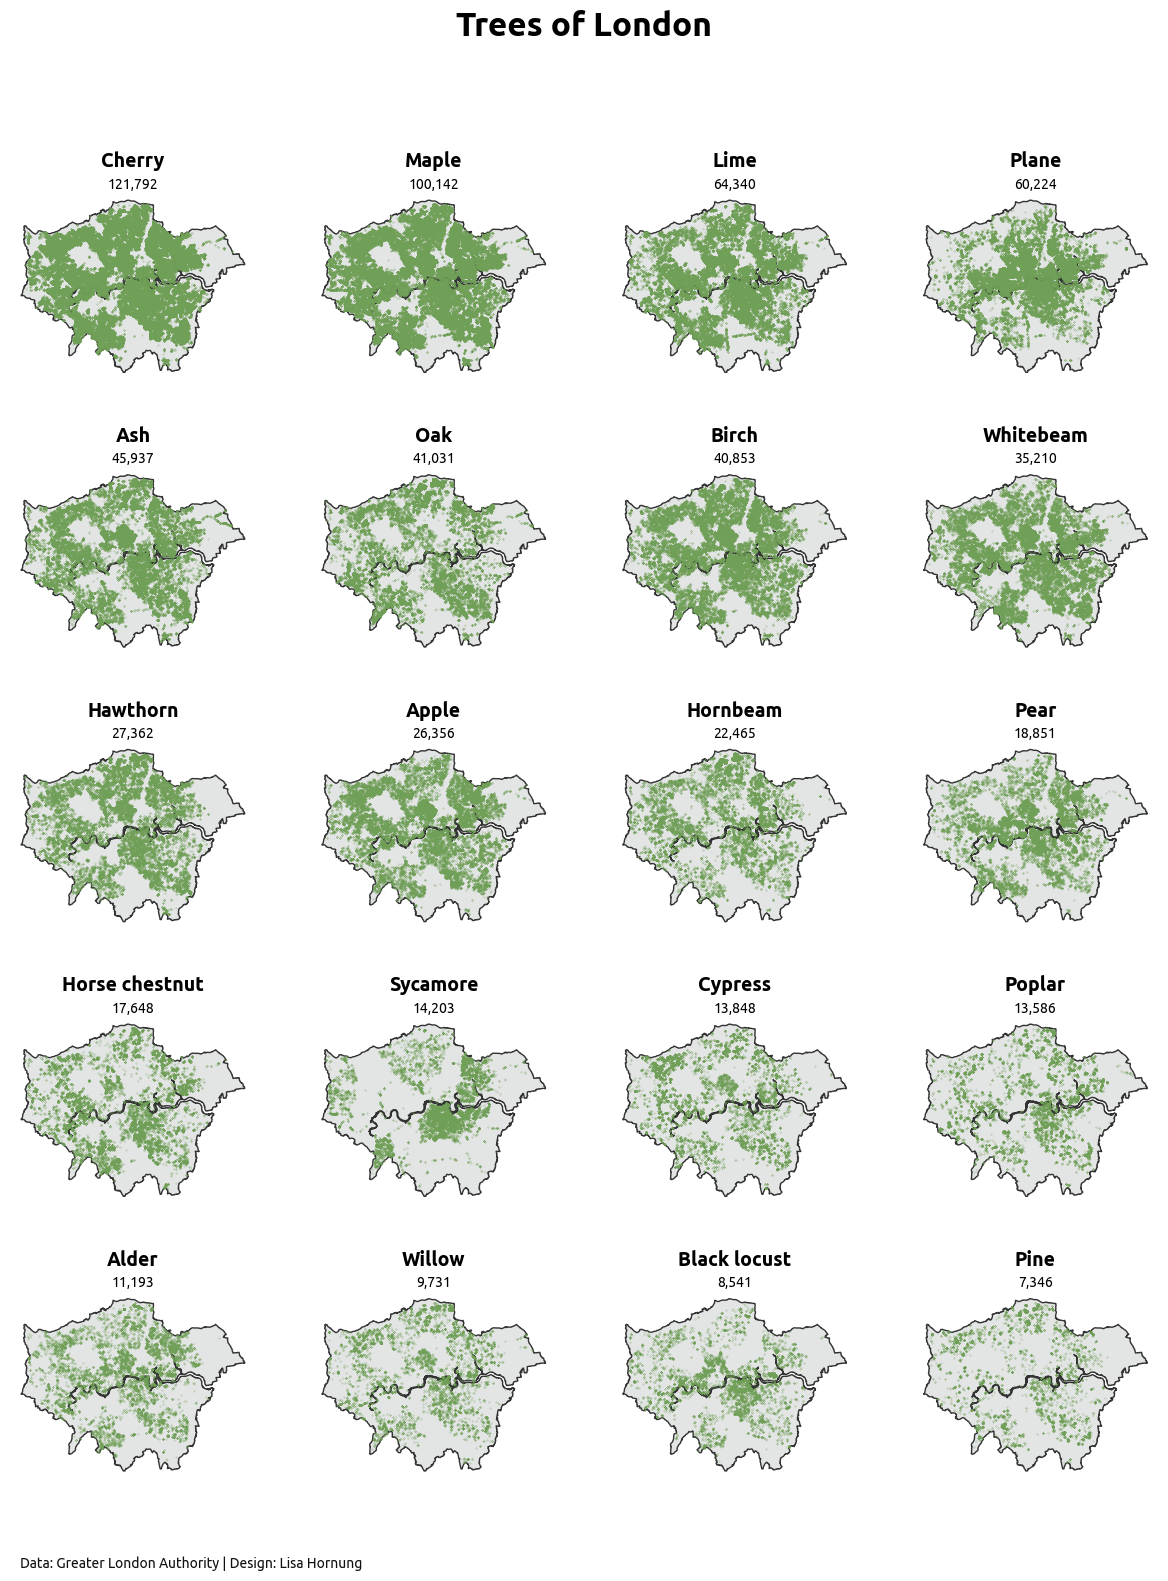

In [8]:
cols = {"bg": "white", "maps": '#E3E5E5', "Cherry": "#539158", "Maple": "#ADB67C", "Lime": "#72A090", 'Plane' : "#458969",
       'Ash': "#BBC967", 'Oak': "#8FBC94", 'Birch': "#3E7253", 'Whitebeam': "#7DCCA4",
       'Hawthorn': "#7A7652", 'Apple': "#6DA34D", 'Hornbeam': "#84B59F", 'Pear': "#A6B591",
       'Horse chestnut': "#7D8C82", 'Sycamore': "#AC9969", 'Cypress': "#CCCC71", 'Poplar': "#7CAB73",
       'Alder': "#47682C", 'Willow': "#799254", 'Black locust': "#7EAA86", 'Pine': "#104547"}

#setup figure and grid
fig, axs = plt.subplot_mosaic([['Cherry', 'Maple','Lime', 'Plane' ],
                               ['Ash', 'Oak', 'Birch', 'Whitebeam'],
                               ['Hawthorn', 'Apple', 'Hornbeam', 'Pear'],
                               ['Horse chestnut', 'Sycamore', 'Cypress', 'Poplar'],
                               ['Alder', 'Willow', 'Black locust', 'Pine']],
                              figsize=(12, 14))   
plt.subplots_adjust(left=0.01, bottom=0.03, right=0.99, top=0.95, wspace=0.1, hspace=0.45)    
fig.set_facecolor(cols["bg"])

for ax in axs:
    london.to_crs(epsg=4326).plot(ax=axs[ax], color=cols["maps"], edgecolor='#333333', linewidth=1)
    
    #plot trees
    data = geo_df[geo_df["gla_tree_name"]==ax]
    data.plot(color="#70A057",
             ax=axs[ax],
             markersize=0.05,
            alpha=0.85)

    #format axis
    axs[ax].axis('off')
    xmin, xmax = axs[ax].get_xlim()
    axs[ax].text((xmin+xmax)/2, 51.77, ax, fontsize=14, fontproperties=title_font,
                 ha="center", clip_on=False)
    axs[ax].text((xmin+xmax)/2, 51.72, '{:,.0f}'.format(len(data)), fontsize=10, fontproperties=label_font,
                 ha="center", clip_on=False)
    axs[ax].set_facecolor(cols["bg"])

#title and footer
fig.suptitle('Trees of London', fontsize=24, y=1.08, fontproperties=title_font)
fig.text(0.03, -0.03, "Data: Greater London Authority | Design: Lisa Hornung", fontsize=10, ha='left',va="center",
             fontweight="normal", color="#111111" ,fontproperties=label_font)

# ==========
#save
plt.savefig("trees-in-london-v2.png", bbox_inches='tight',  transparent=False, pad_inches=0.70)

plt.show()

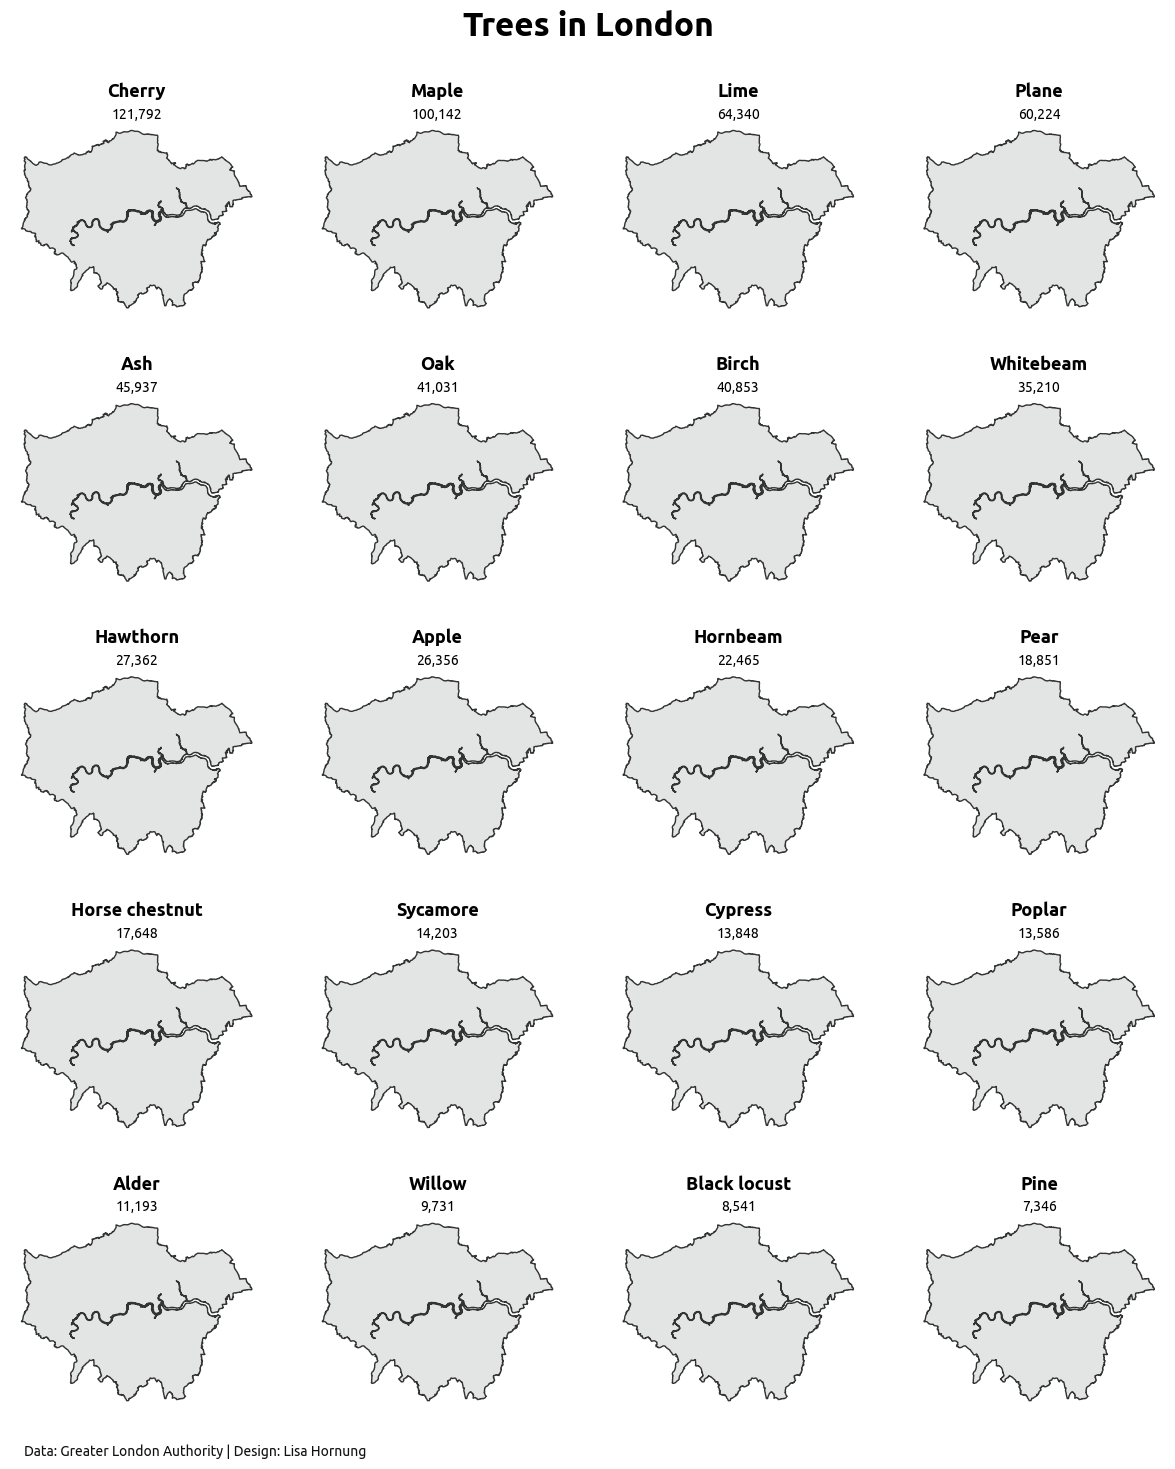

In [37]:
# design and format layout before plotting trees
cols = {"bg": "white", "maps": "#E3E5E5", "Cherry": "#539158", "Maple": "#ADB67C", "Lime": "#72A090", 'Plane' : "#458969",
       'Ash': "#BBC967", 'Oak': "#8FBC94", 'Birch': "#3E7253", 'Whitebeam': "#7DCCA4",
       'Hawthorn': "#7A7652", 'Apple': "#6DA34D", 'Hornbeam': "#84B59F", 'Pear': "#A6B591",
       'Horse chestnut': "#7D8C82", 'Sycamore': "#AC9969", 'Cypress': "#CCCC71", 'Poplar': "#7CAB73",
       'Alder': "#47682C", 'Willow': "#799254", 'Black locust': "#7EAA86", 'Pine': "#104547"}

fig, axs = plt.subplot_mosaic([['Cherry', 'Maple','Lime', 'Plane' ],
                               ['Ash', 'Oak', 'Birch', 'Whitebeam'],
                               ['Hawthorn', 'Apple', 'Hornbeam', 'Pear'],
                               ['Horse chestnut', 'Sycamore', 'Cypress', 'Poplar'],
                               ['Alder', 'Willow', 'Black locust', 'Pine']],
                              figsize=(12, 14))
     
plt.subplots_adjust(left=0.01, bottom=0.03, right=0.99, top=0.95, wspace=0.1, hspace=0.4)    

fig.set_facecolor(cols["bg"])
for ax in axs:
    #print(ax)
    london.to_crs(epsg=4326).plot(ax=axs[ax], color=cols["maps"], edgecolor='#333333', linewidth=1)
    
    #plot trees
    data = geo_df[geo_df["gla_tree_name"]==ax]
    
    #format axis
    axs[ax].axis('off')
    xmin, xmax = axs[ax].get_xlim()
    axs[ax].text((xmin+xmax)/2, 51.77, ax, fontsize=13, fontproperties=title_font,
                 ha="center", clip_on=False)
    axs[ax].text((xmin+xmax)/2, 51.72, '{:,.0f}'.format(len(data)), fontsize=10, fontproperties=label_font,
                 ha="center", clip_on=False)
    axs[ax].set_facecolor(cols["bg"])
    
fig.suptitle('Trees in London', fontsize=24, y=1.03, fontproperties=title_font)
fig.text(0.03, 0, "Data: Greater London Authority | Design: Lisa Hornung", fontsize=10, ha='left',va="center",
             fontweight="normal", color="#111111" ,fontproperties=label_font)

plt.show()